## Water Quality Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv(r"E:\MCA\NIT Trichy\ML\Project\water_potability.csv")

In [10]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [12]:
data.shape

(3276, 10)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [14]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [16]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [17]:
data.fillna(data.mean(),inplace = True)

In [18]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


<AxesSubplot:>

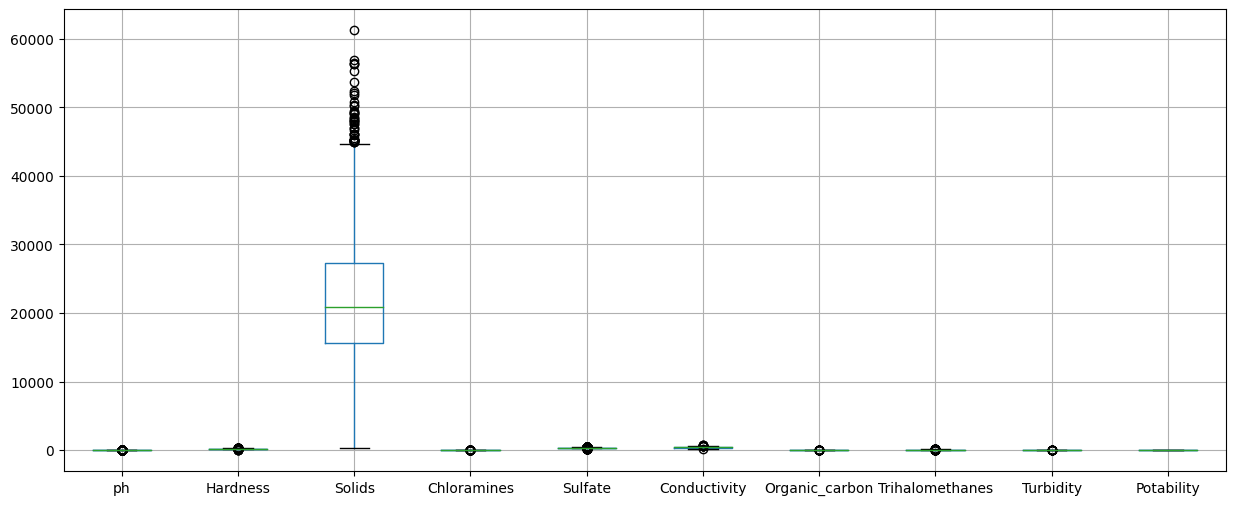

In [21]:
data.boxplot(figsize=(15,6))

In [22]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690300
50%      20927.833605
75%      27332.762125
max      61227.196010
Name: Solids, dtype: float64

In [24]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

C:\Users\abdhe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

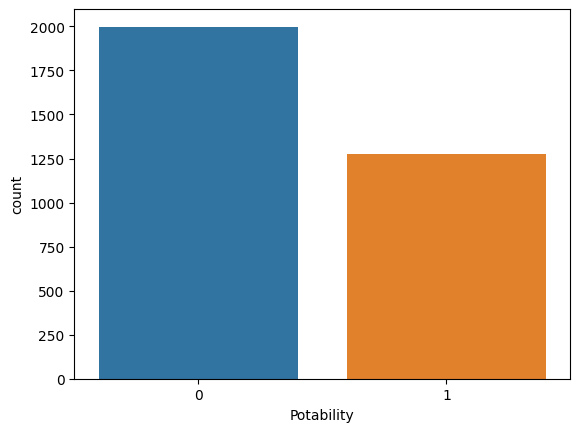

In [25]:
sns.countplot(data['Potability'])

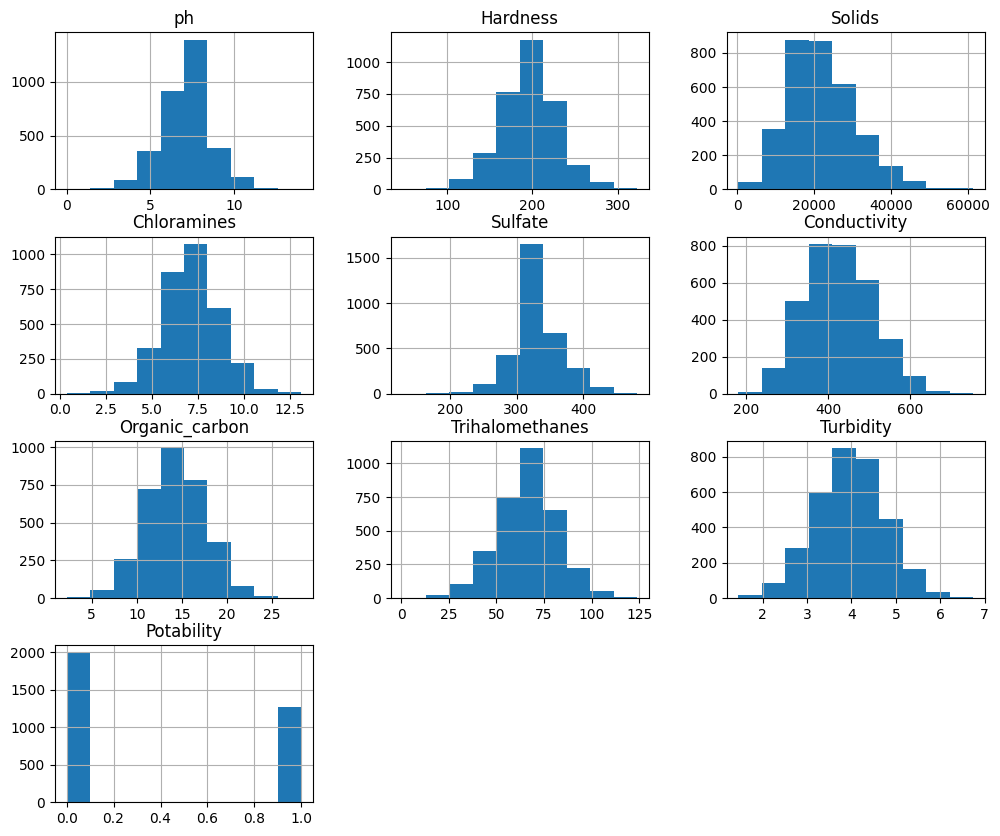

In [28]:
data.hist(figsize=(12,10))
plt.show()

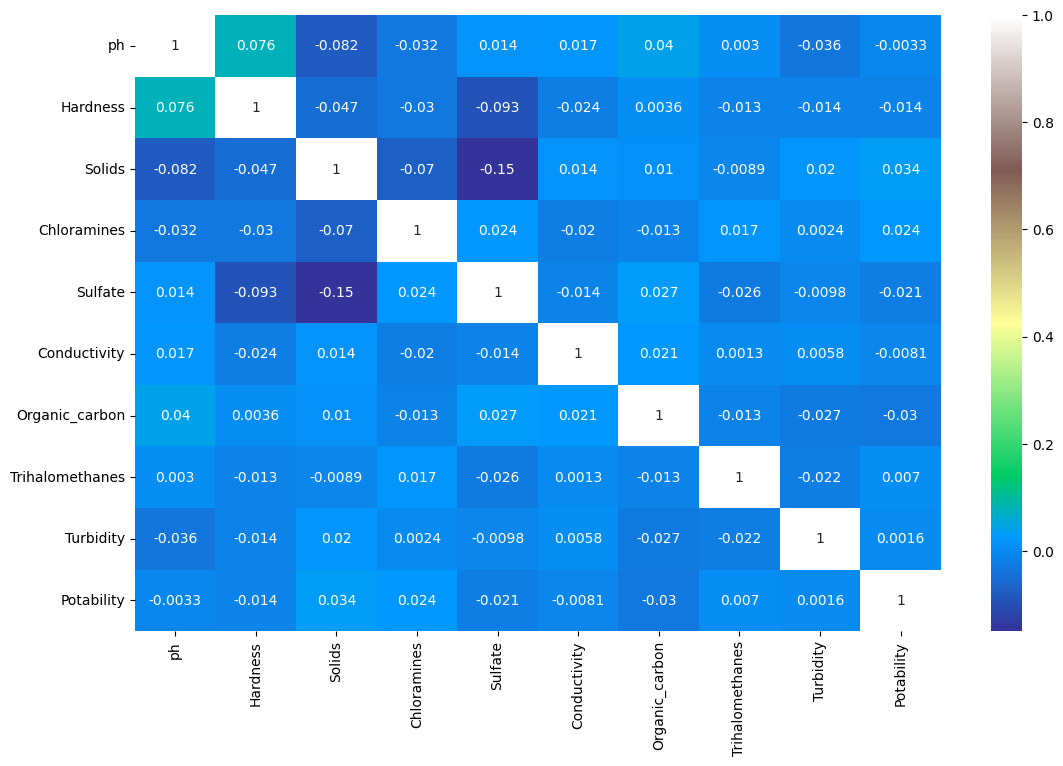

In [139]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(),annot=True,cmap='terrain')
plt.show()

### Partitioning

In [29]:
Y = data.Potability

In [31]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [32]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [33]:
Prediction_features = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

In [36]:
X = data[Prediction_features]

In [37]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [38]:
from sklearn.model_selection import train_test_split

In [76]:
train_x,val_x,train_y,val_y = train_test_split(X ,Y , test_size = 0.3, shuffle=True, random_state = 1)

In [77]:
train_x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1236,7.104295,177.571744,12691.51597,7.170977,333.775777,447.032289,14.376764,60.743770,5.464857
1026,7.159398,171.816105,28954.80101,5.817090,357.328759,530.526411,18.117042,79.094440,3.254926
250,9.445130,145.805402,13168.52916,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165
2066,6.741246,196.833001,23565.73271,7.594584,315.574602,500.142898,11.663073,31.778484,3.500971
1488,7.255799,200.163795,32595.12024,7.572435,324.551513,489.272160,12.305634,45.687421,3.968177
...,...,...,...,...,...,...,...,...,...
2763,6.359431,208.203021,23347.17271,9.000395,333.775777,336.585610,14.173906,66.396293,3.636495
905,7.080795,192.202168,34160.92514,8.963156,363.472798,474.781734,15.905270,50.807825,2.998335
1096,7.080795,142.145566,45141.68604,6.030640,240.198505,369.280429,20.605552,70.168389,4.604725
235,4.814136,205.214041,17650.40505,8.121080,350.487939,414.030709,10.999416,47.402666,5.190852


In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rfc_model = RandomForestClassifier()

In [134]:
rfc_model.fit(train_x, train_y)

RandomForestClassifier()

In [135]:
val_predictions = rfc_model.predict(val_x)

In [136]:
from sklearn.metrics import mean_absolute_error, accuracy_score

In [137]:
mean_absolute_error(val_predictions,val_y)

0.34893184130213634

In [138]:
accuracy_score(val_y,val_predictions)

0.6510681586978637